# Kappa Test

## Testing of Kappa integer requirement on the system

## Kappa Test Rules
### 'None' refers to no enforcement on kappa. Kappa is allowed to be a decimal type, as originally specified.
### 'Fixed' refers to a fixed kappa value from the the 'starting kappa' value.
### 'Round' refers to the ability for kappa to move its nearest integer value given an update large enough trigger this action. 

### In this case all other system controls were held constant. You will see that the two new kappa rules do not initalize seamlessly with the currently modeled agents. You will also see that the initial negative attestation also serves to initialize the system in a unbalanced state between the bonding curve and attestation mechanisms.

### Further computation is required to initialize the dynamic phase with updated initial conditions that will reflect essentially the lack of movement on kappa given the vast majority of actions on the attestation mechanism.

### First recommendation is to pre-compute starting conditions given the large initial attestation, specifically a safe operating kappa.
### Second, there may be a need to impose a bound on attestation action magnitude if using a fixed kappa.
### Third, if using decimal is not possible, then a fixed point arithmetic method is recommended, as often incorporated in Solidity on the Ethereum Virtual Mackine.

In [1]:
import sys
sys.path.append('../')

### cadCAD Specification Diagram

In [2]:
# For displaying image files
from IPython.display import Image

In [3]:
# Image("..\images\Phase_3_secondary.png")
# print(sys.path)

### Import Libraries for Analysis and Visualization

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

### Installed cadCAD Installed Version Check

In [5]:
pip freeze | grep cadCAD

cadCAD==0.4.23
Note: you may need to restart the kernel to use updated packages.


### Import Parent cadCAD Model and Utilities

In [6]:
from cadCAD.configuration import Experiment

from cadCAD import configs

from src.config_wrapper import ConfigWrapper

# from src import run_wrapper2
from src import run_wrapper

import src.sim as sim

# custom plotting function
from src.utils import param_test_plot

### Choose number of Monte Carlo runs ('N') and/or number of Timesteps ('T') and/or to update parameter values ('M') 

### Current N, T, and M

In [7]:
# get list of keys and values from M
parametric_experiment = ConfigWrapper(sim)
model_keys = parametric_experiment.get_config()
model_keys[0]

{'N': 1,
 'T': range(0, 365),
 'M': {'starting_kappa': 2,
  'starting_alpha': 0.5,
  'money_raised': 66000,
  'monthly_instalment': 3000,
  'C': 72600,
  'f': 0.03,
  'm': 0.15,
  'beta': 0.9,
  'dust': 1e-08,
  'period': 1200,
  'rules_price': 'martin',
  'E': 0.2,
  'ENABLE_CONTINUOUS': True,
  'THETA': 0.9,
  'ENABLE_BURN': False,
  'fee_numerator': 997,
  'fee_denominator': 1000,
  'kappa_rule': 'round'}}

### Choose a parameter and list of values to sweep over

In [8]:
new_kappa = 2

In [9]:
update_params = {
    'ENABLE_BURN' : [False],
    # 'monthly_instalment' : [3000],
    # 'money_raised' : [6000],
    # 'E' : [0.2, 0.3],
    'starting_kappa' : [new_kappa] 
}

### Update Timesteps, if desired
Current Number of TImesteps

In [10]:
# Original
New_Timesteps = model_keys[0]['T']

# New Change Value
New_Timesteps = range(365)
New_Timesteps

range(0, 365)

### Update Monte Carlo Runs, if desired
Current Number of Runs

In [11]:
# Original
New_Runs = model_keys[0]['N']

# New Change Value
# New_Runs = 10
New_Runs

1

In [12]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [13]:
parametric_experiment.get_config()

[{'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72600,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'kappa_rule': 'round'}},
 {'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72600,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'kappa_rule': 'none'}},
 {'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalme

In [14]:
initial_state = parametric_experiment.get_initial_conditions()

In [15]:
initial_state

{'reserve': 66000,
 'pbar': 1,
 'realized_price': 0,
 'spot_price': 1,
 'kappa': 2,
 'supply': 132000.0,
 'alpha': 0.5,
 'alpha_bar': 0.5,
 'supply_0': 30000,
 'supply_1': 0,
 'supply_free': 102000.0,
 'attestations': 30000,
 'attestations_0': 30000,
 'attestations_1': 0,
 'invariant_V': 264000.0,
 'invariant_I': 102300.0,
 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0    0                     0                     0            100   
 1    1                     0                     0            100   
 2    2                     0                     0            100   
 3    3                     0                     0            100   
 4    4                     0                     0            100   
 5    5                     0                     0            100   
 6    6                     0                     0            100   
 7    7                     0                     0            100   
 8    8                     0      

### Update Initial Conditions based on new starting kappa

In [16]:
initial_state['kappa'] = new_kappa
initial_state['supply'] = new_kappa * model_keys[0]['M']['money_raised'] / initial_state['spot_price']
initial_state['supply_free'] = initial_state['supply']
initial_state['invariant_V'] = (initial_state['supply']**initial_state['kappa']) / initial_state['reserve']


In [17]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [18]:
parametric_experiment.get_initial_conditions()

{'reserve': 66000,
 'pbar': 1,
 'realized_price': 0,
 'spot_price': 1,
 'kappa': 2,
 'supply': 132000.0,
 'alpha': 0.5,
 'alpha_bar': 0.5,
 'supply_0': 30000,
 'supply_1': 0,
 'supply_free': 132000.0,
 'attestations': 30000,
 'attestations_0': 30000,
 'attestations_1': 0,
 'invariant_V': 264000.0,
 'invariant_I': 102300.0,
 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0    0                     0                     0            100   
 1    1                     0                     0            100   
 2    2                     0                     0            100   
 3    3                     0                     0            100   
 4    4                     0                     0            100   
 5    5                     0                     0            100   
 6    6                     0                     0            100   
 7    7                     0                     0            100   
 8    8                     0      

In [19]:

del configs[:]

parametric_experiment.append()

In [20]:
parametric_experiment.get_config()

[{'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72600,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'kappa_rule': 'round'}},
 {'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72600,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'kappa_rule': 'none'}},
 {'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalme

### Generate config_ids to match results with swept variable input

In [21]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

In [22]:
config_ids

[{'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72600,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'kappa_rule': 'round'},
  'simulation_id': 0,
  'run_id': 0,
  'subset_id': 0},
 {'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72600,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'kappa_rule': 'none'},
  'simulation_id': 0,
  'run_id': 1,
  'subset_id': 1},
 {'M': {'starting_kappa': 2,
   'starting_alpha': 0.5,
   'money_raised': 66000,
   'mo

### Execute cadCAD Simulation

In [23]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (365, 18, 3, 22)
Execution Method: local_simulations
SimIDs   : [0, 0, 0]
SubsetIDs: [0, 1, 2]
Ns       : [0, 1, 2]
ExpIDs   : [0, 0, 0]
Execution Mode: parallelized
Total execution time: 5.94s


In [24]:
experiments.head()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,chosen_agent,public_alpha,funds_from_bond,UNI_supply,UNI_reserve,simulation,subset,run,substep,timestep
0,0,66000.0,1.0,0,1.000000,2.0,132000.000000,0.5,0.5,30000,...,0,0,0.0,132000.0,66000,0,0,1,0,0
1,6,66000.0,0.0,0,0.775000,2.0,132000.000000,0.5,0.5,30000,...,"{'id': 2, 'agent_attestations_1': 0, 'agent_at...",0,0.0,132000.0,66000,0,0,1,6,1
2,12,66000.0,-0.0,0,11.000966,2.0,9299.183050,0.5,0.5,30000,...,"{'id': 15.0, 'agent_attestations_1': 0.0, 'age...",0,0.0,132000.0,66000,0,0,1,6,2
3,18,66000.0,-0.0,0,85.966831,2.0,1189.993851,0.5,0.5,30000,...,"{'id': 15.0, 'agent_attestations_1': 0.0, 'age...",0,0.0,132000.0,66000,0,0,1,6,3
4,24,66000.0,-0.0,0,422.988420,2.0,241.850593,0.5,0.5,30000,...,"{'id': 10.0, 'agent_attestations_1': 0.0, 'age...",0,0.0,132000.0,66000,0,0,1,6,4


In [25]:
experiments.tail()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,chosen_agent,public_alpha,funds_from_bond,UNI_supply,UNI_reserve,simulation,subset,run,substep,timestep
1093,6548,66000.0,0.0,0,102300.0,2.0,1.0,0.5,0.5,30000,...,"{'id': 17.0, 'agent_attestations_1': 0.0, 'age...",0,42000.0,132000.0,66000,0,2,2,6,361
1094,6554,66000.0,0.0,0,102300.0,2.0,1.0,0.5,0.5,30000,...,"{'id': 4.0, 'agent_attestations_1': 0.0, 'agen...",0,42000.0,132000.0,66000,0,2,2,6,362
1095,6560,66000.0,0.0,0,102300.0,2.0,1.0,0.5,0.5,30000,...,"{'id': 5.0, 'agent_attestations_1': 0.0, 'agen...",0,42000.0,132000.0,66000,0,2,2,6,363
1096,6566,66000.0,0.0,0,102300.0,2.0,1.0,0.5,0.5,30000,...,"{'id': 7.0, 'agent_attestations_1': 0.0, 'agen...",0,42000.0,132000.0,66000,0,2,2,6,364
1097,6572,66000.0,0.0,0,102300.0,2.0,1.0,0.5,0.5,30000,...,"{'id': 11.0, 'agent_attestations_1': 0.0, 'age...",0,42000.0,132000.0,66000,0,2,2,6,365


In [26]:
len(experiments)

1098

### Bonded funds are split into backing the bond (into reserve fund) and backing the project (funds_from_bond).

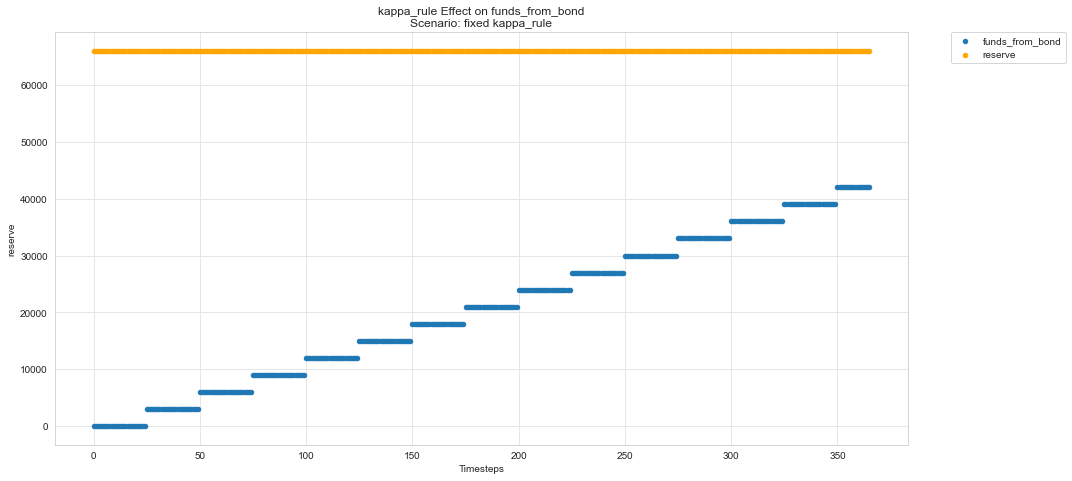

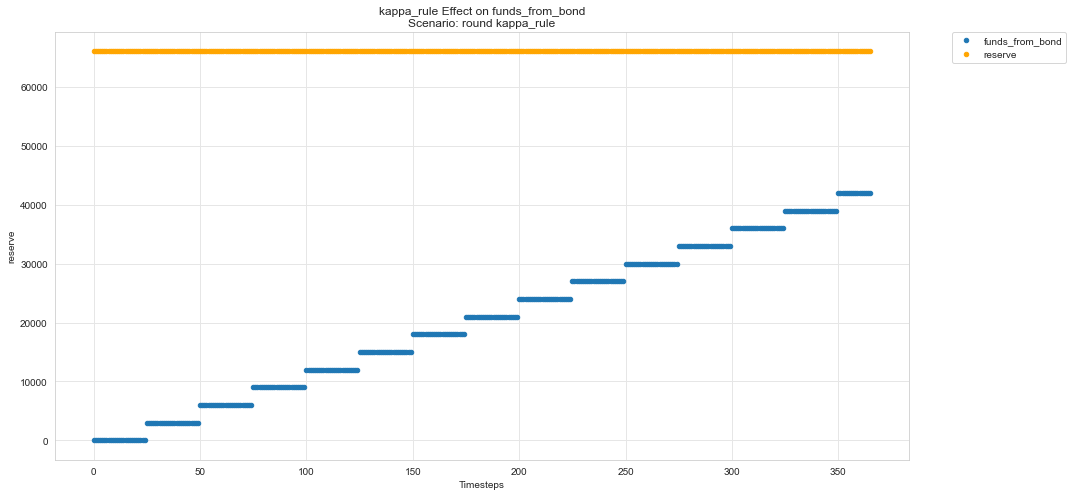

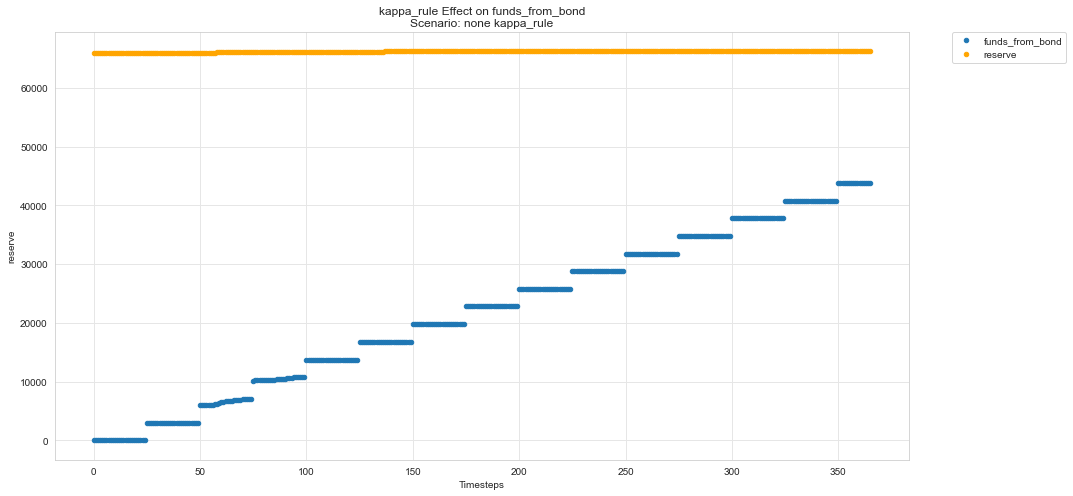

In [27]:
param_test_plot(experiments, config_ids, 'kappa_rule','funds_from_bond', 'reserve')

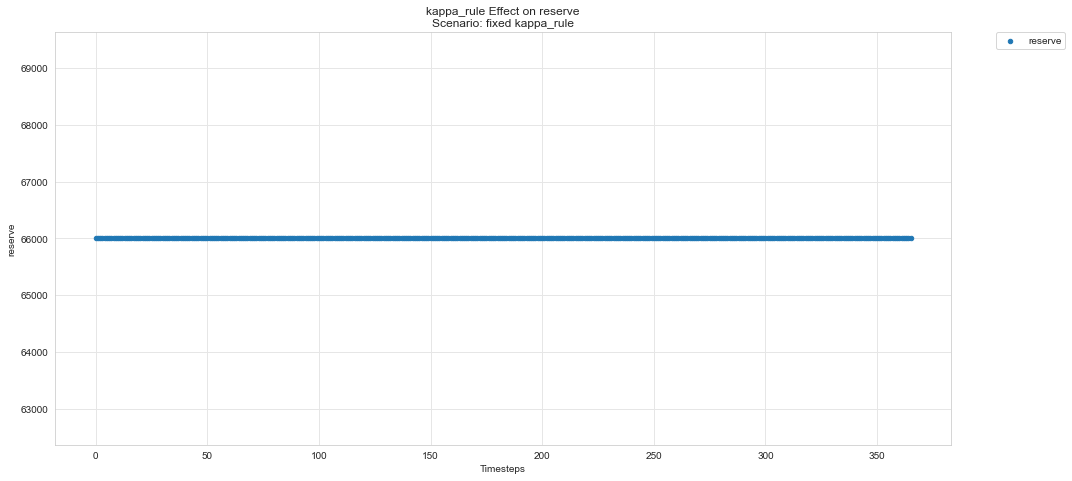

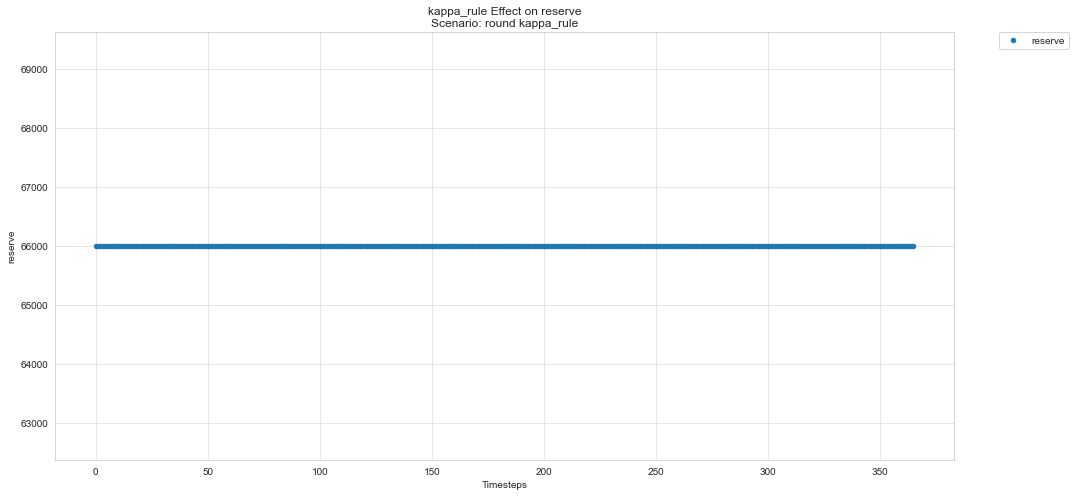

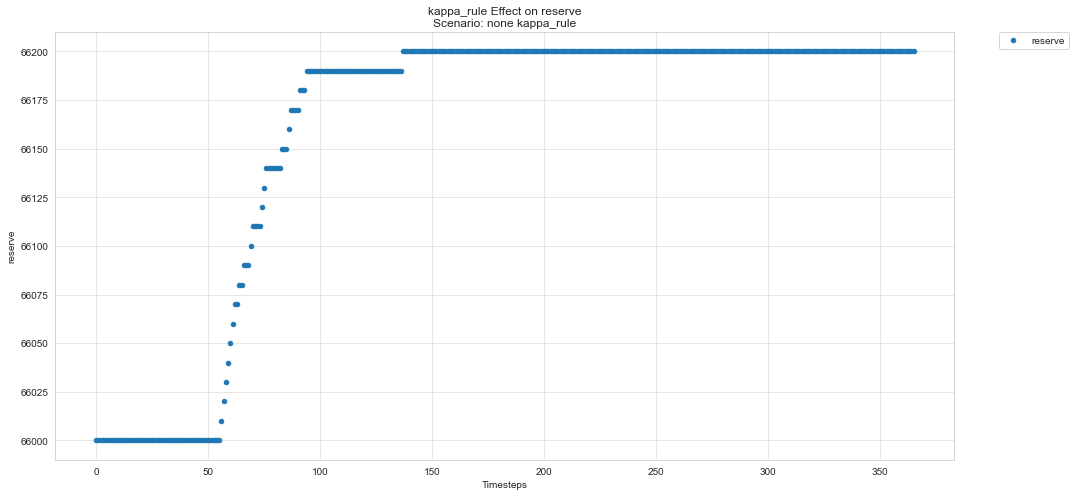

In [28]:
param_test_plot(experiments, config_ids, 'kappa_rule', 'reserve')

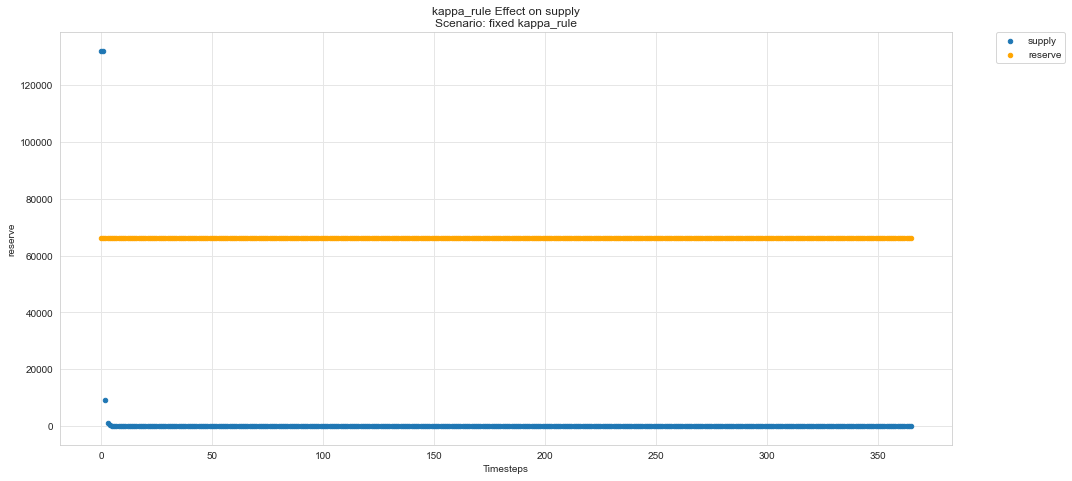

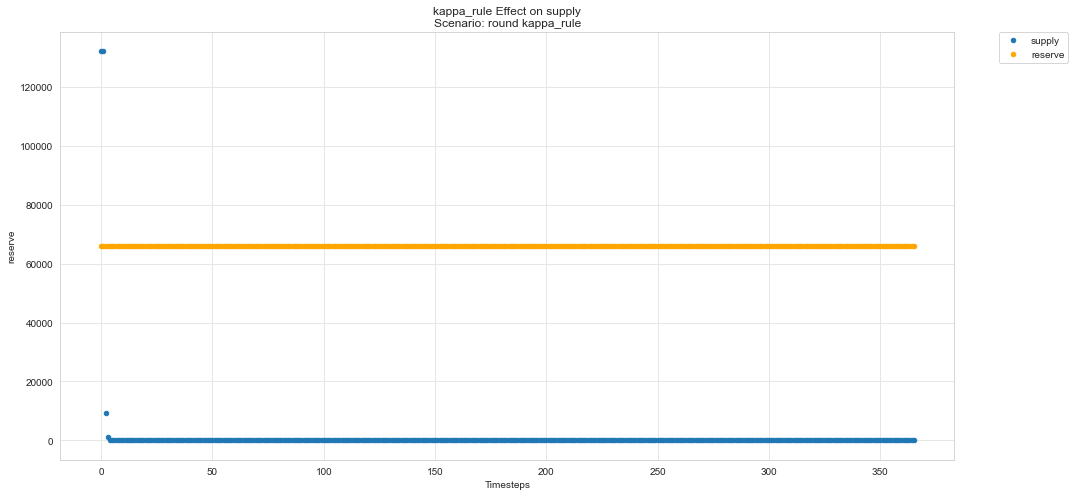

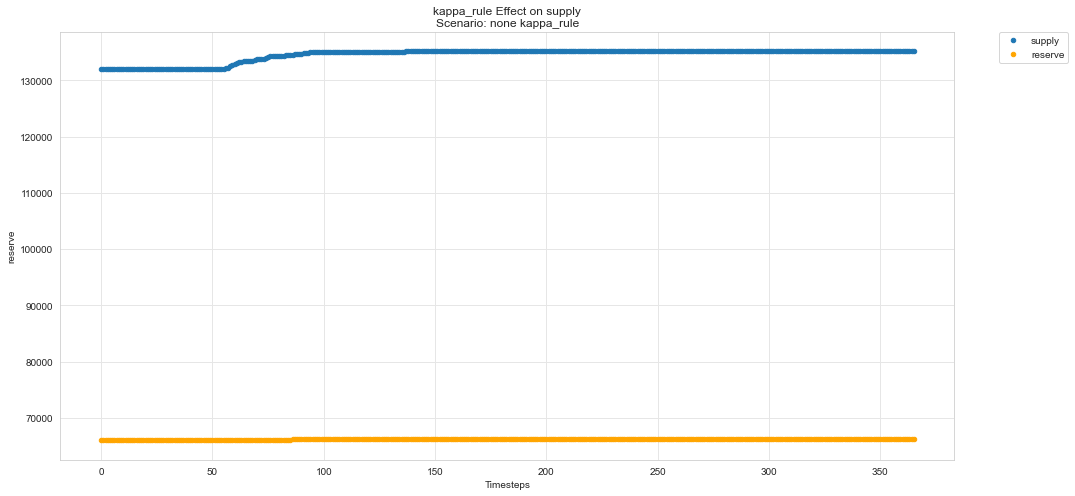

In [29]:
param_test_plot(experiments, config_ids, 'kappa_rule','supply', 'reserve')

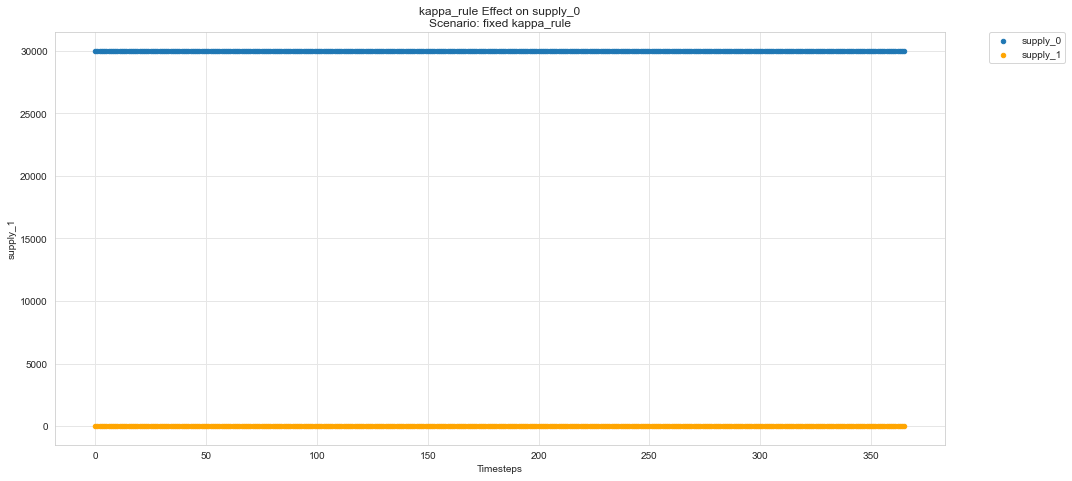

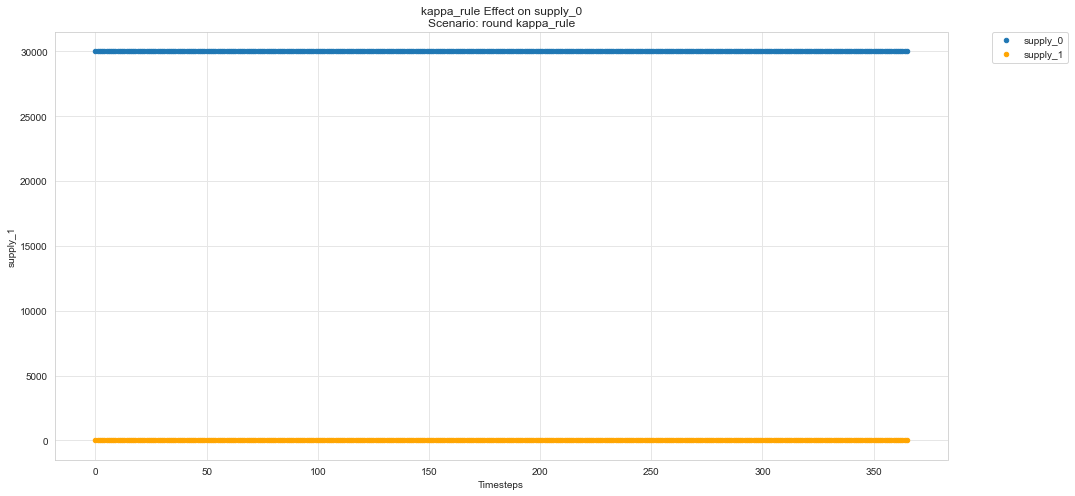

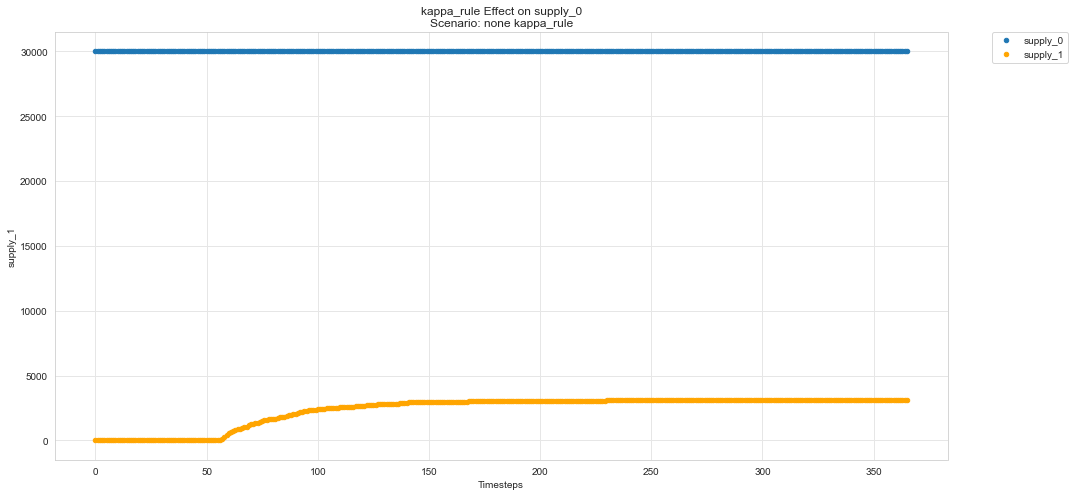

In [30]:
param_test_plot(experiments, config_ids, 'kappa_rule','supply_0', 'supply_1')

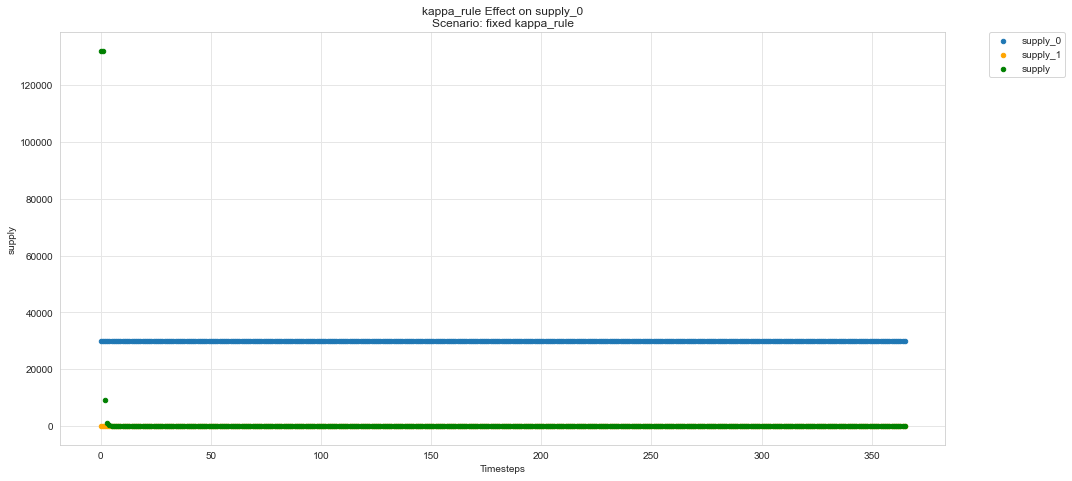

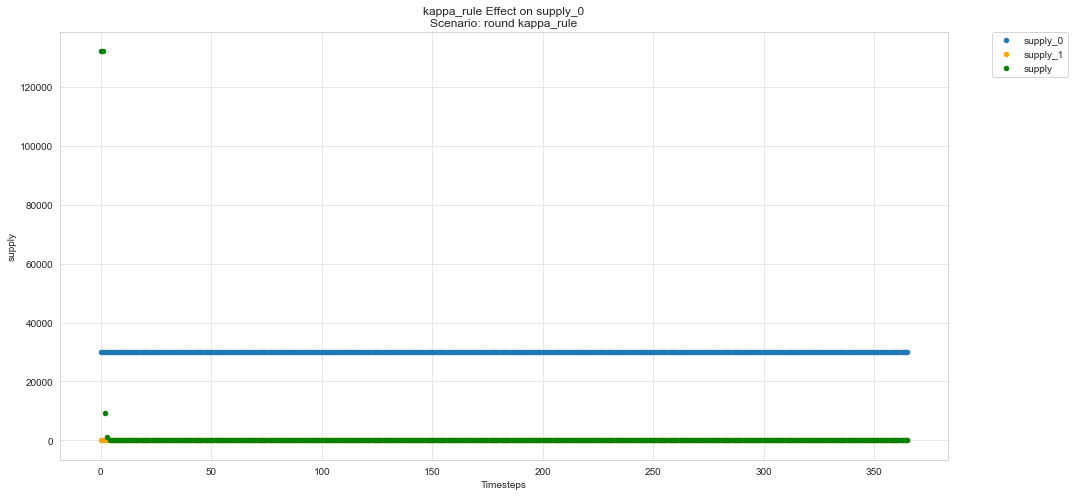

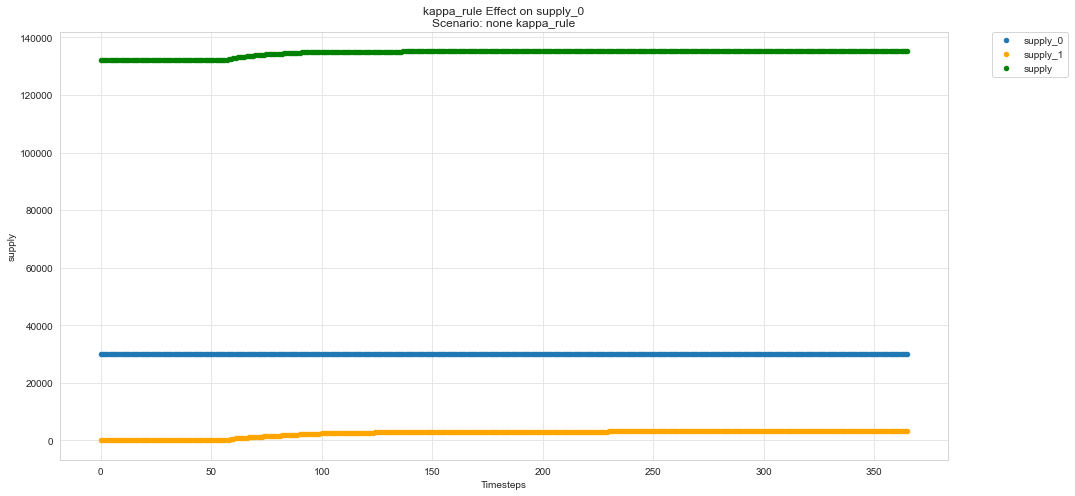

In [31]:
param_test_plot(experiments, config_ids, 'kappa_rule','supply_0', 'supply_1', 'supply')

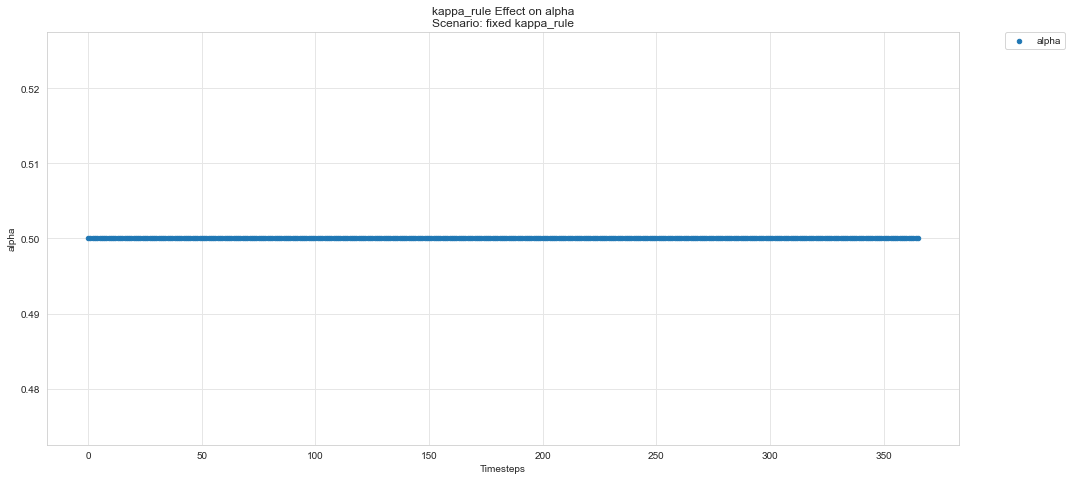

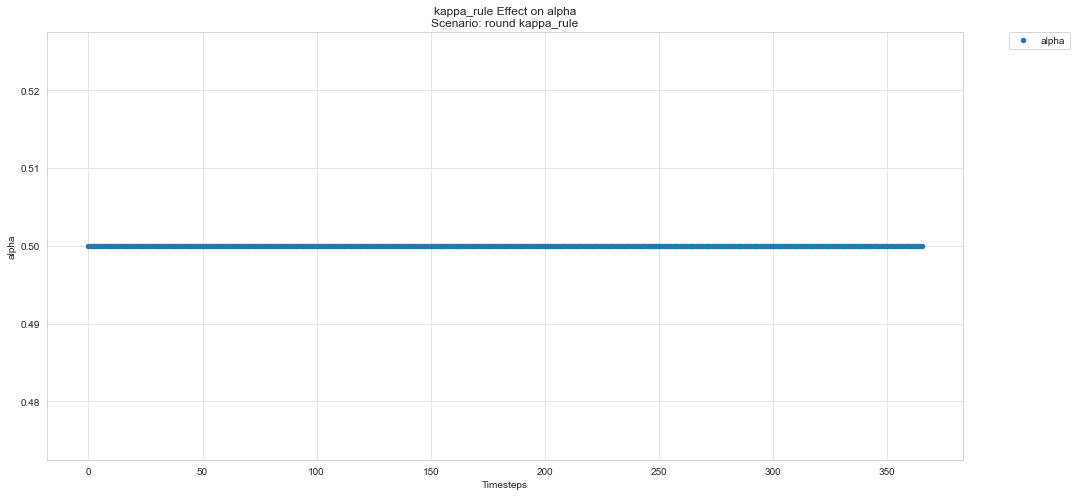

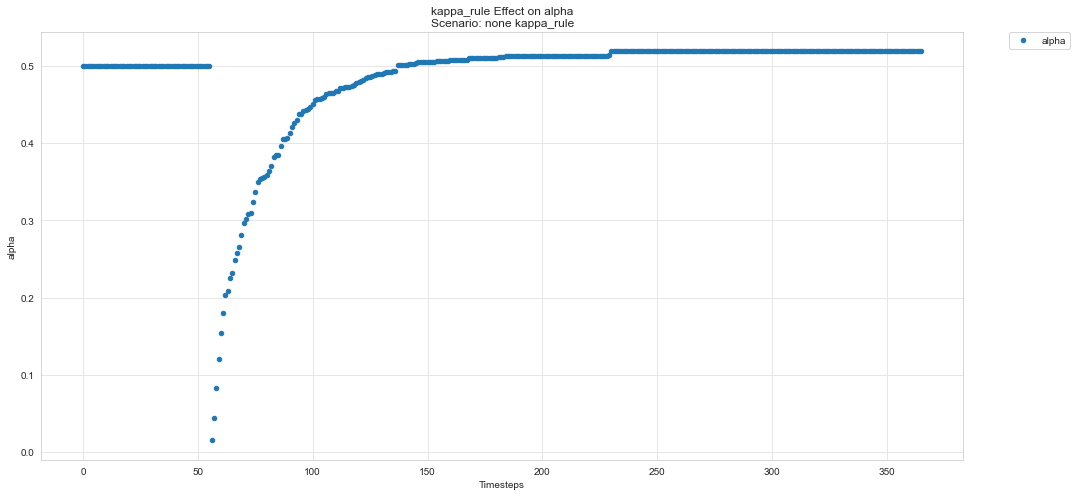

In [32]:
param_test_plot(experiments, config_ids, 'kappa_rule','alpha')

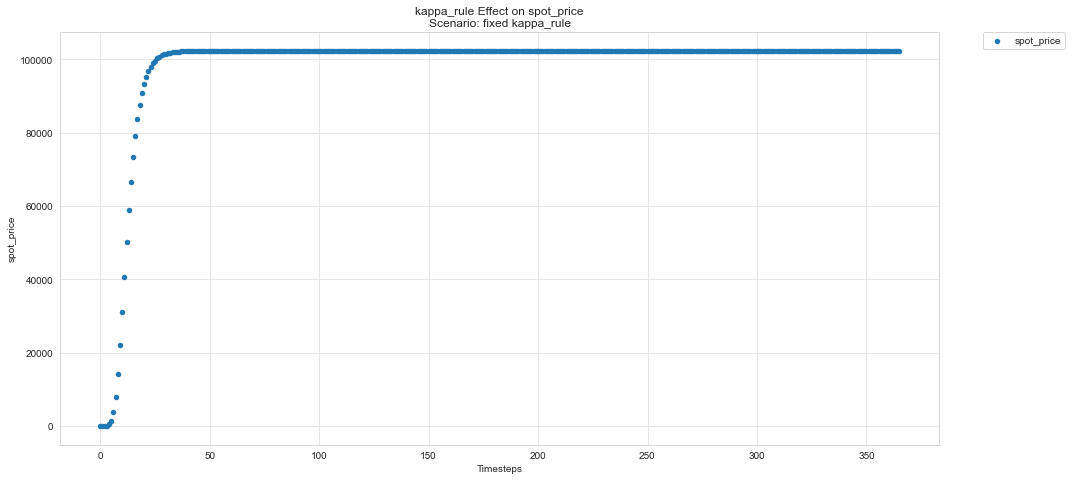

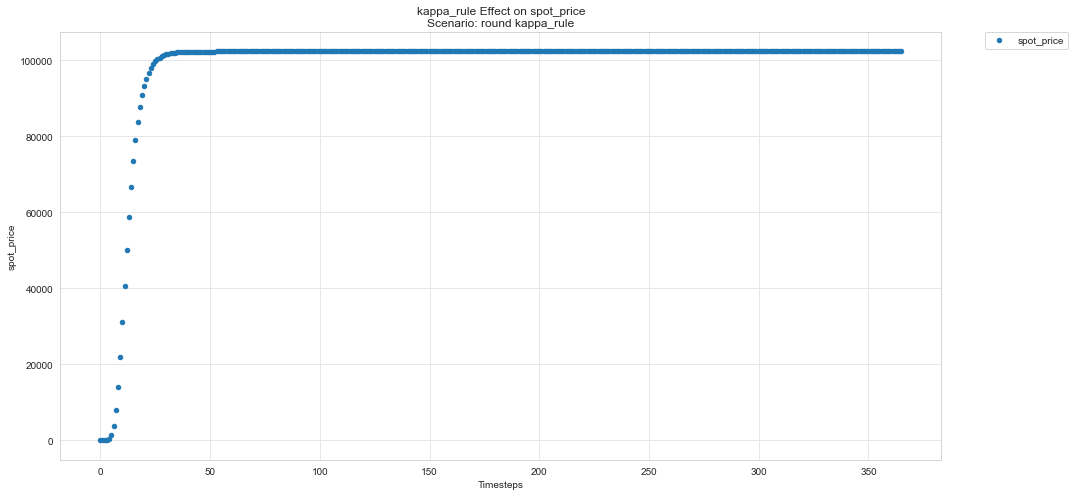

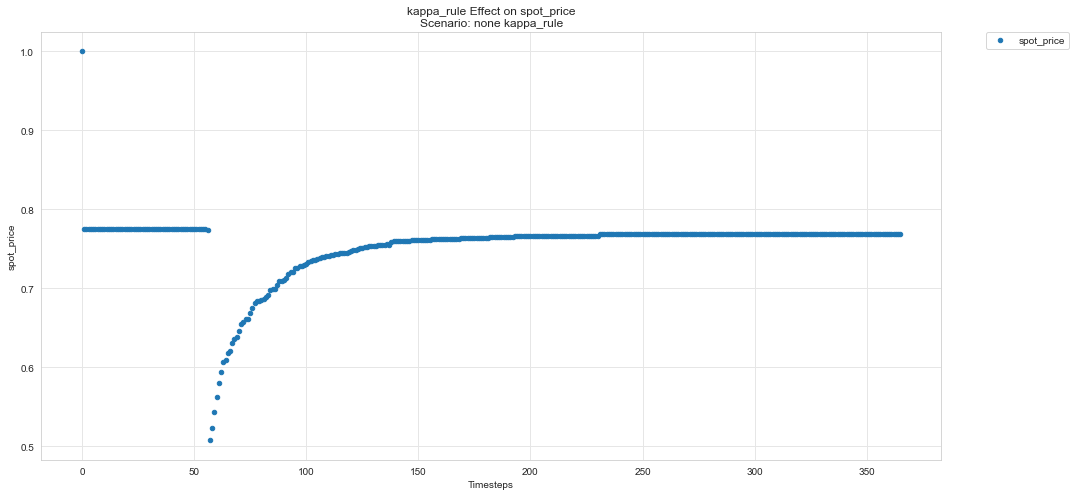

In [33]:
param_test_plot(experiments, config_ids, 'kappa_rule', 'spot_price')

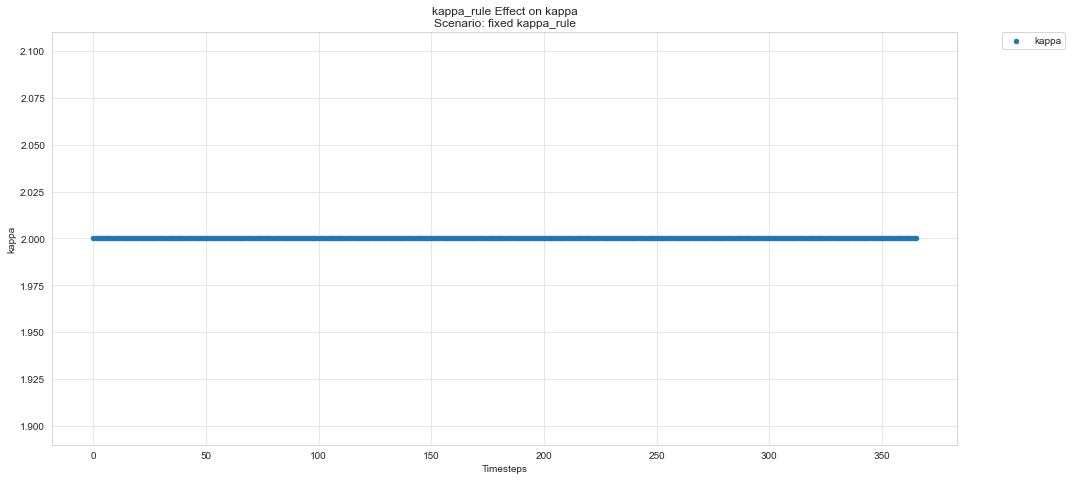

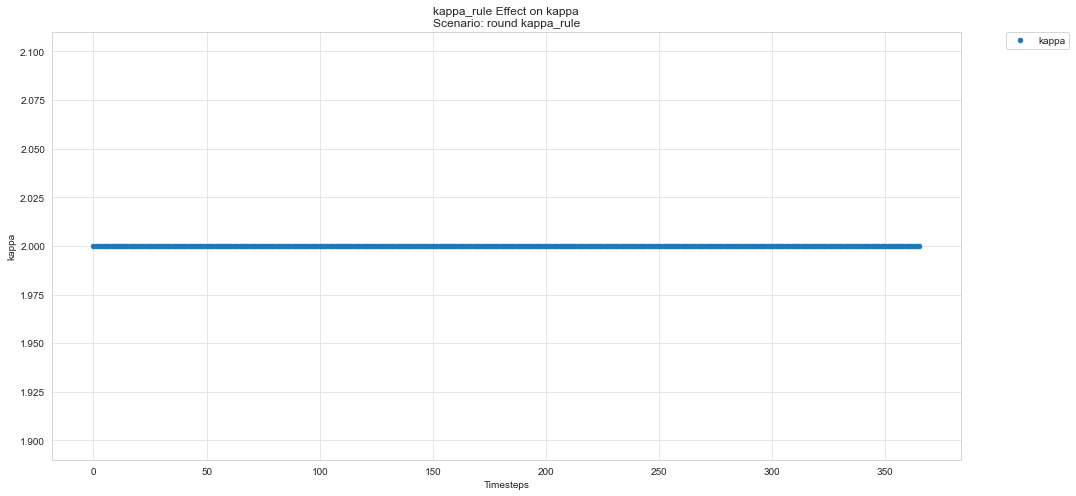

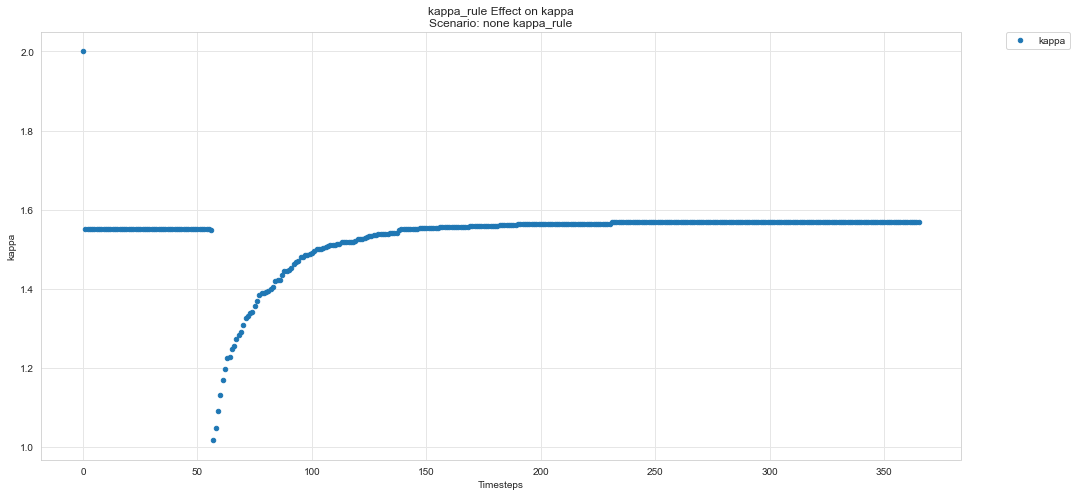

In [34]:
param_test_plot(experiments, config_ids, 'kappa_rule', 'kappa')

### Use for customizing plots

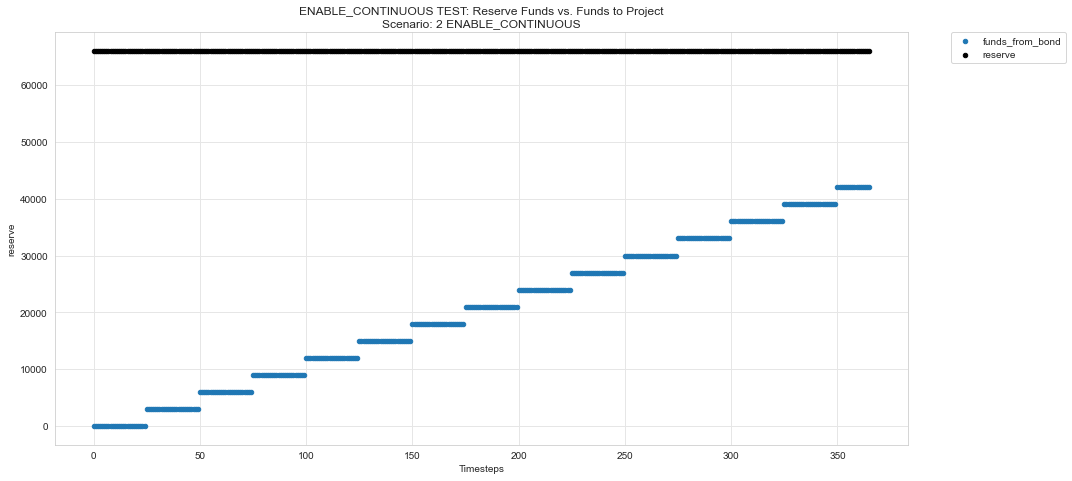

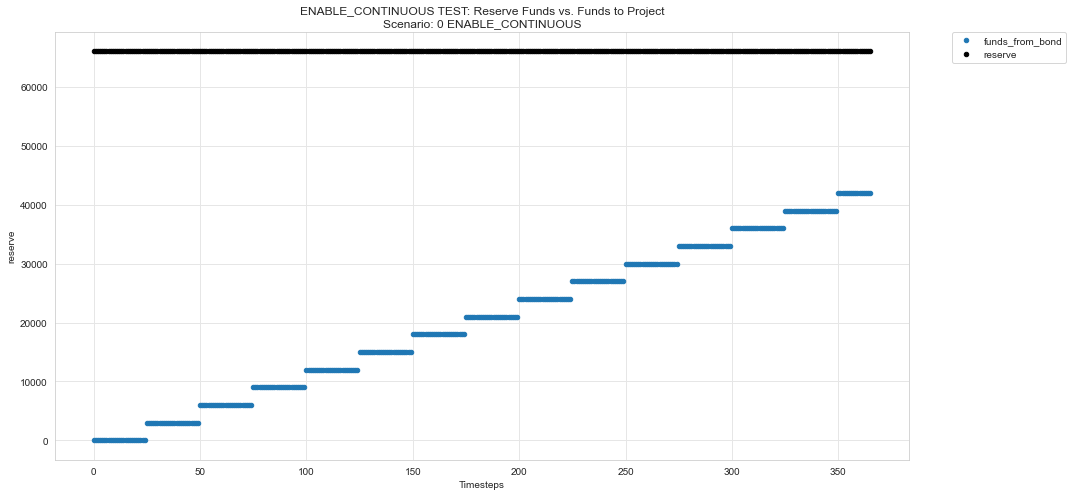

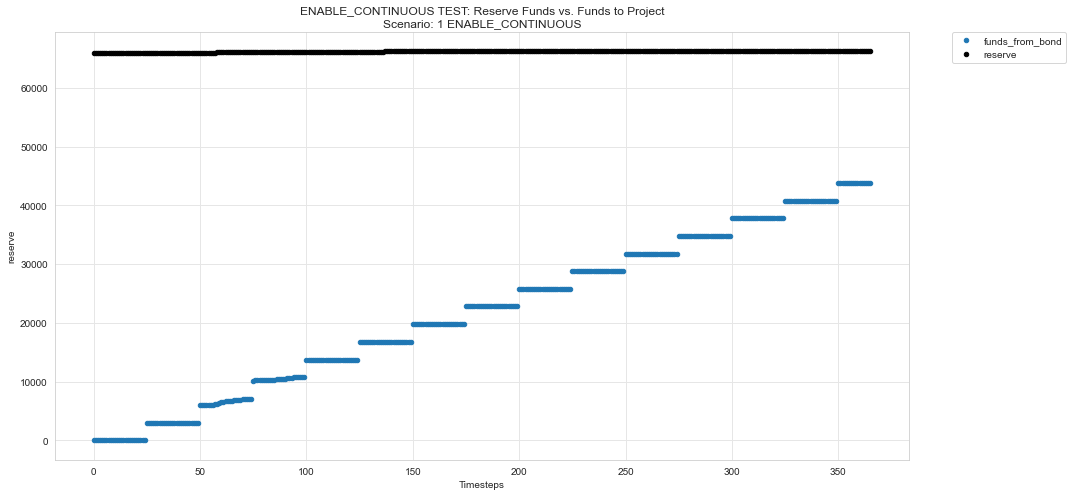

In [35]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['subset']
    cc_label = experiments.iloc[cc_idx]['subset']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['subset']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    df = sub_experiments.copy()
    colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

    ax = axs
    title = 'ENABLE_CONTINUOUS TEST: Reserve Funds vs. Funds to Project' + '\n' + 'Scenario: ' + str(cc_label)  + ' ENABLE_CONTINUOUS'
    # + 'Scenario: ' + str(cc_label)  + ' rules_price'
    ax.set_title(title)
    ax.set_ylabel('Funds')

    df.plot(x='timestep', y='funds_from_bond', label='funds_from_bond', ax=ax, legend=True, kind ='scatter')
    df.plot(x='timestep', y='reserve', label='reserve', ax=ax, legend=True, color = colors[5], kind ='scatter')

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_xlabel('Timesteps')
    ax.grid(color='0.9', linestyle='-', linewidth=1)

    plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()